In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
file_path = 'graphgenexp_correlation_results.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,conv_type,num_layers,dropout,l2,best_model_epoch,train_loss,train_acc,val_loss,val_acc,test_acc,pearson_corr_avg_class_0,pearson_corr_avg_class_1,spearman_corr_avg_class_0,spearman_corr_avg_class_1
0,GraphConv,2,0.0,0.00001,33,0.082679,0.965714,0.118653,0.951875,0.96375,0.261620,0.311224,0.245912,0.285127
1,GraphConv,2,0.0,0.00010,38,0.090963,0.966607,0.122540,0.955000,0.96250,0.230992,0.169787,0.224998,0.215952
2,GraphConv,2,0.0,0.00100,43,0.113662,0.957857,0.133678,0.947500,0.96375,0.353205,0.330338,0.375768,0.372031
3,GraphConv,2,0.0,0.01000,48,0.186984,0.924464,0.194448,0.921875,0.93750,0.266637,0.318877,0.264863,0.318901
4,GraphConv,2,0.0,0.10000,30,0.315333,0.870357,0.360139,0.845000,0.86125,0.322254,0.395758,0.312979,0.371565


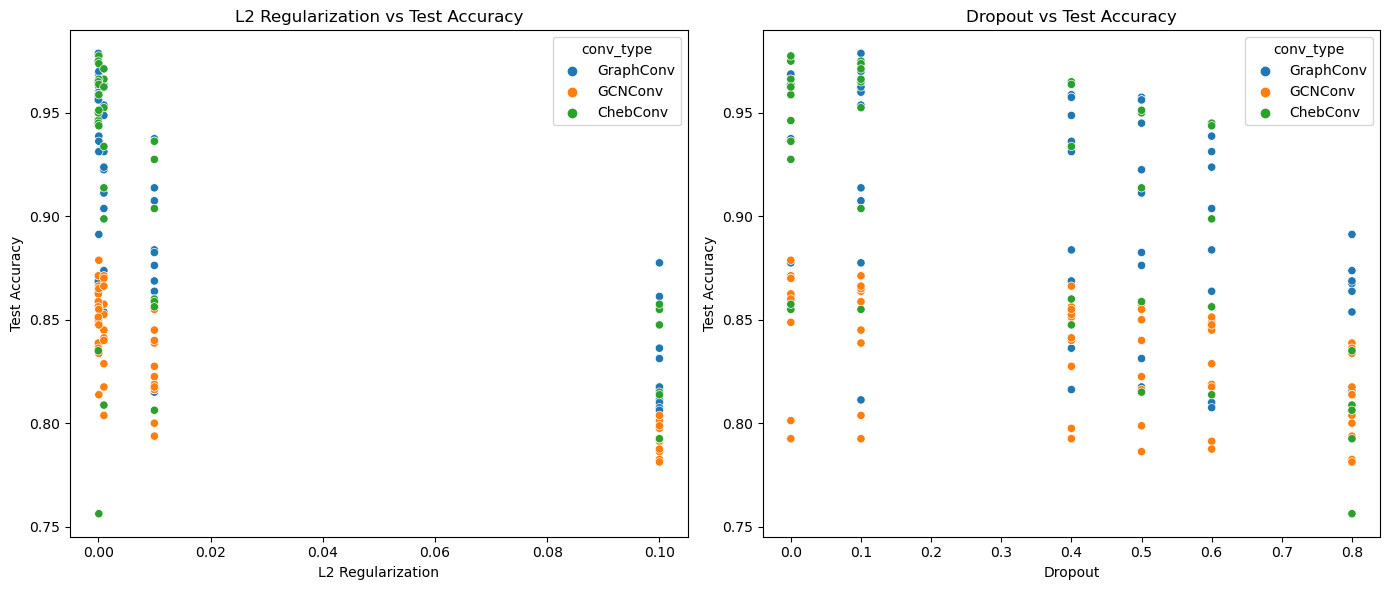

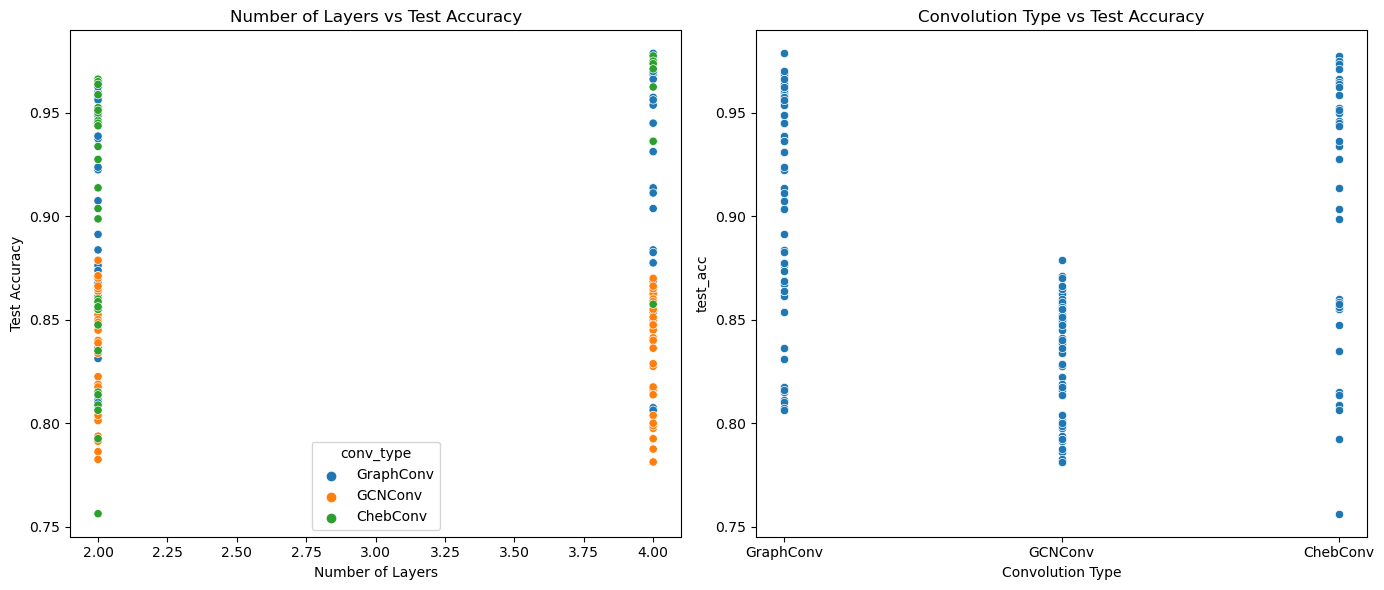

In [41]:
# Creating scatter plots for l2 and dropout vs test_acc
plt.figure(figsize=(14, 6))

# l2 vs Test Accuracy
plt.subplot(1, 2, 1)
sns.scatterplot(x='l2', y='test_acc', hue='conv_type', data=data)
plt.title('L2 Regularization vs Test Accuracy')
plt.xlabel('L2 Regularization')
plt.ylabel('Test Accuracy')

# Dropout vs Test Accuracy
plt.subplot(1, 2, 2)
sns.scatterplot(x='dropout', y='test_acc', hue='conv_type', data=data)
plt.title('Dropout vs Test Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Test Accuracy')

plt.tight_layout()
plt.show()

# Creating scatter plots for l2 and dropout vs num_layers
plt.figure(figsize=(14, 6))

# Number of Layers vs Test Accuracy
plt.subplot(1, 2, 1)
sns.scatterplot(x='num_layers', y='test_acc', hue='conv_type', data=data)
plt.title('Number of Layers vs Test Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')

# Conv type vs Test Accuracy
plt.subplot(1, 2, 2)
sns.scatterplot(x='conv_type', y='test_acc', data=data)
plt.title('Convolution Type vs Test Accuracy')
plt.xlabel('Convolution Type')


plt.tight_layout()
plt.show()


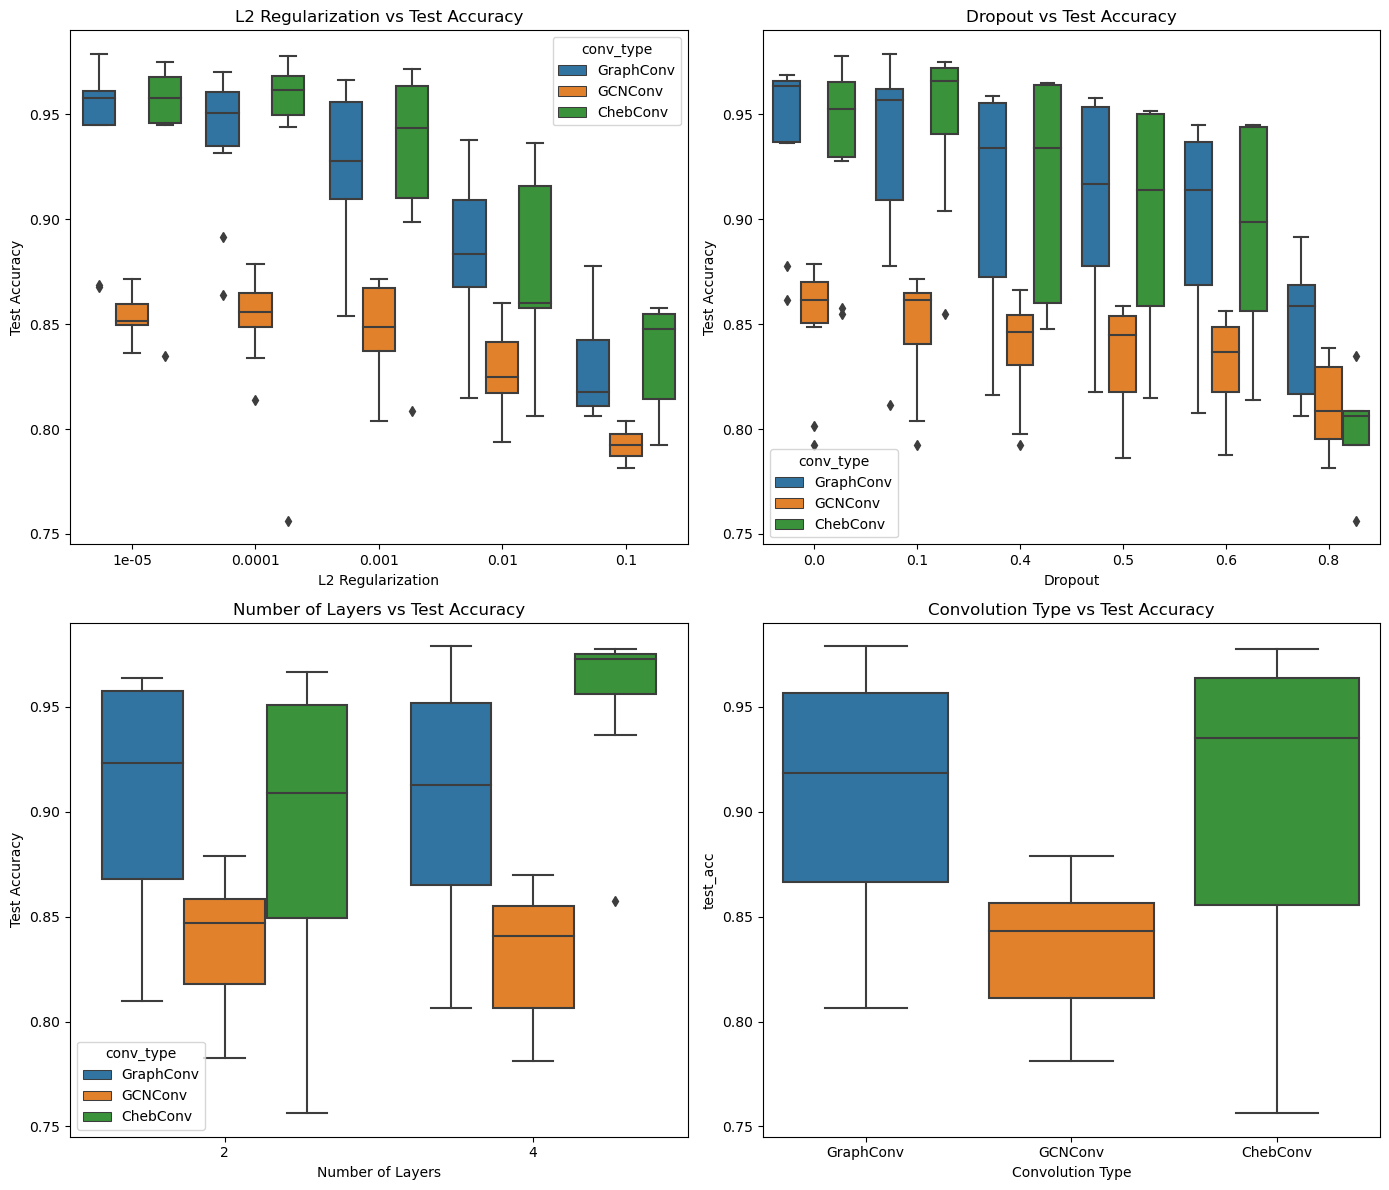

In [49]:
# Creating box plots for l2, dropout, num_layers, and conv_type vs test_acc
plt.figure(figsize=(14, 12))

# L2 Regularization vs Test Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(x='l2', y='test_acc', hue='conv_type', data=data)
plt.title('L2 Regularization vs Test Accuracy')
plt.xlabel('L2 Regularization')
plt.ylabel('Test Accuracy')

# Dropout vs Test Accuracy
plt.subplot(2, 2, 2)
sns.boxplot(x='dropout', y='test_acc', hue='conv_type', data=data)
plt.title('Dropout vs Test Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Test Accuracy')

# Number of Layers vs Test Accuracy
plt.subplot(2, 2, 3)
sns.boxplot(x='num_layers', y='test_acc', hue='conv_type', data=data)
plt.title('Number of Layers vs Test Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')

# Convolution Type vs Test Accuracy
plt.subplot(2, 2, 4)
sns.boxplot(x='conv_type', y='test_acc', data=data)
plt.title('Convolution Type vs Test Accuracy')
plt.xlabel('Convolution Type')

plt.tight_layout()
plt.show()


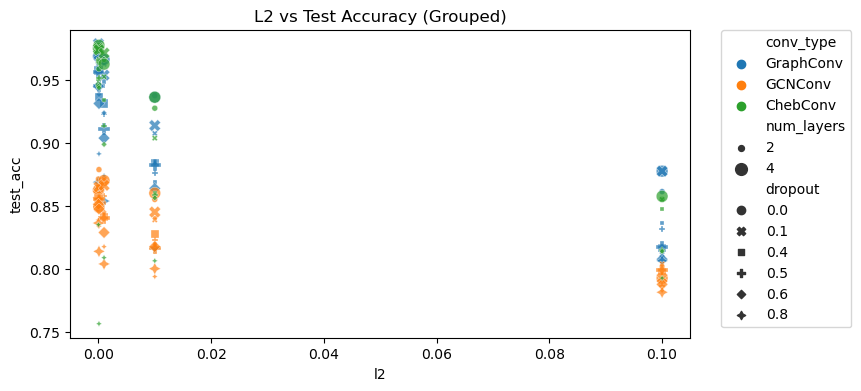

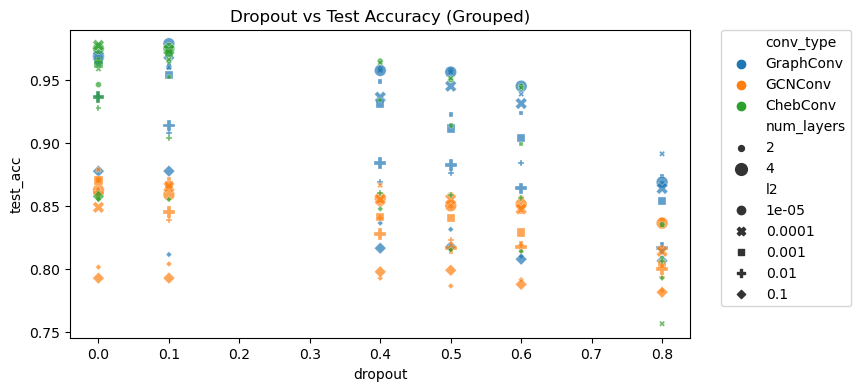

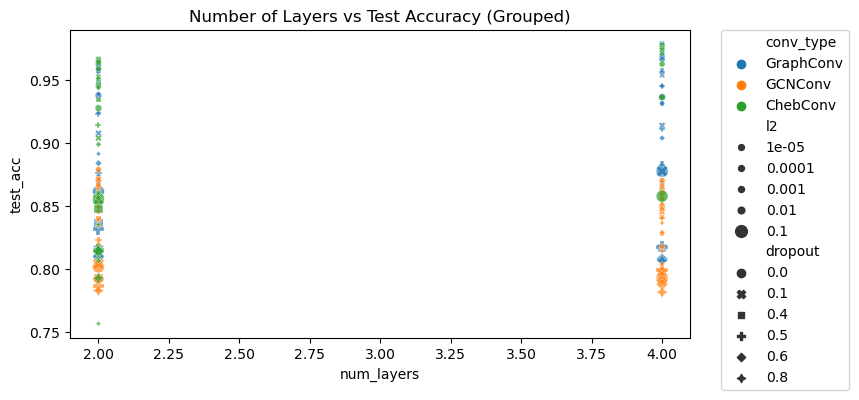

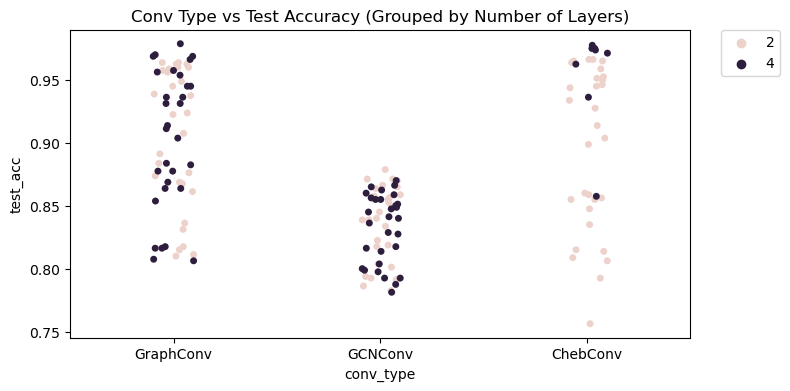

In [24]:
# Function to create scatter plots with grouping
def grouped_scatter(x, y, group_by_cols, data, title):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=x, y=y, hue=group_by_cols[0], style=group_by_cols[1], size=group_by_cols[2], data=data, alpha=0.7)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 1. l2 vs test_acc grouped by conv_type, dropout, num_layers
grouped_scatter('l2', 'test_acc', ['conv_type', 'dropout', 'num_layers'], data, 'L2 vs Test Accuracy (Grouped)')
# 2. dropout vs test_acc grouped by conv_type, l2, num_layers
grouped_scatter('dropout', 'test_acc', ['conv_type', 'l2', 'num_layers'], data, 'Dropout vs Test Accuracy (Grouped)')
# 3. num_layers vs test_acc grouped by conv_type, dropout, l2
grouped_scatter('num_layers', 'test_acc', ['conv_type', 'dropout', 'l2'], data, 'Number of Layers vs Test Accuracy (Grouped)')
# Since conv_type is a categorical variable, we'll use a categorical scatter plot (stripplot)
def categorical_grouped_scatter(x, y, group_by_cols, data, title):
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=x, y=y, hue=group_by_cols[0], data=data)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 4. conv_type vs test_acc grouped by num_layers, dropout, l2
# Due to the large number of combinations, we'll use only 'num_layers' for grouping in this example
categorical_grouped_scatter('conv_type', 'test_acc', ['num_layers', 'dropout', 'l2'], data, 'Conv Type vs Test Accuracy (Grouped by Number of Layers)')

# Show the plot
plt.show()


In [ ]:
# Calculating the average Pearson and Spearman correlation across classes
data['pearson_corr_avg'] = data[['pearson_corr_avg_class_0', 'pearson_corr_avg_class_1']].mean(axis=1)
data['spearman_corr_avg'] = data[['spearman_corr_avg_class_0', 'spearman_corr_avg_class_1']].mean(axis=1)

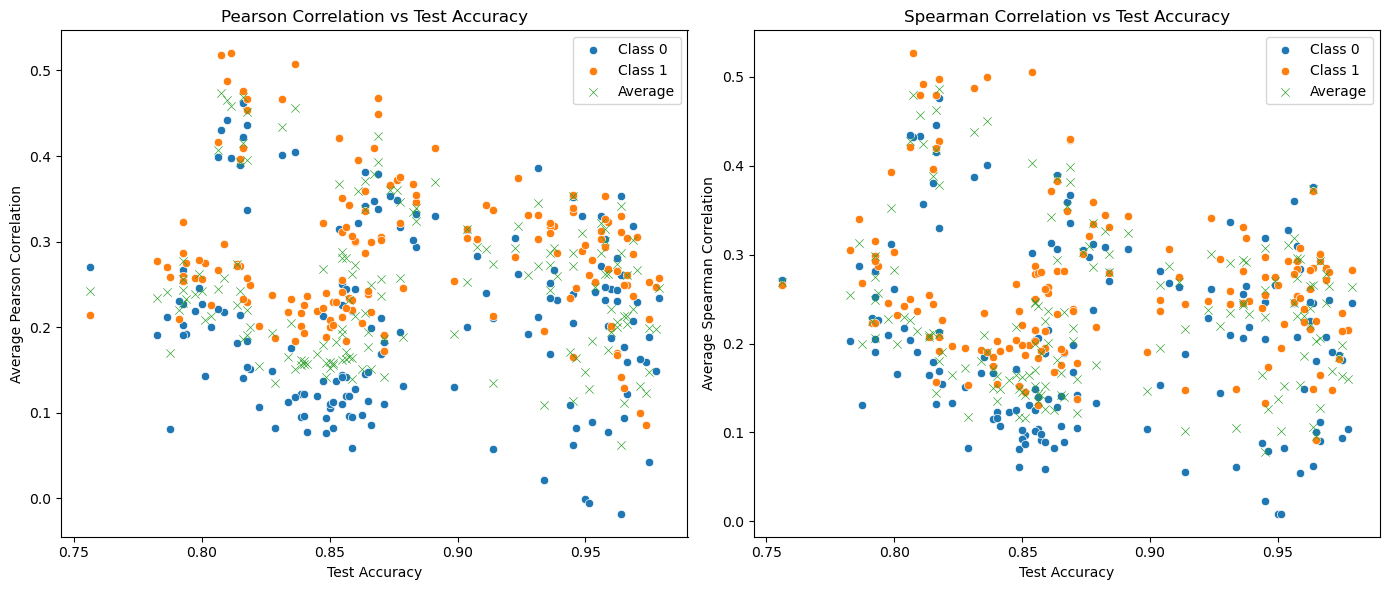

In [11]:
# Creating scatter plots
plt.figure(figsize=(14, 6))

# Pearson correlation vs Test Accuracy
plt.subplot(1, 2, 1)
sns.scatterplot(x='test_acc', y='pearson_corr_avg_class_0', data=data)
sns.scatterplot(x='test_acc', y='pearson_corr_avg_class_1', data=data)
sns.scatterplot(x='test_acc', y='pearson_corr_avg', data=data, marker='x')
plt.title('Pearson Correlation vs Test Accuracy')
plt.xlabel('Test Accuracy')
plt.ylabel('Average Pearson Correlation')
plt.legend(['Class 0', 'Class 1', 'Average'])

# Spearman correlation vs Test Accuracy
plt.subplot(1, 2, 2)
sns.scatterplot(x='test_acc', y='spearman_corr_avg_class_0', data=data)
sns.scatterplot(x='test_acc', y='spearman_corr_avg_class_1', data=data)
sns.scatterplot(x='test_acc', y='spearman_corr_avg', data=data, marker='x')
plt.title('Spearman Correlation vs Test Accuracy')
plt.xlabel('Test Accuracy')
plt.ylabel('Average Spearman Correlation')
plt.legend(['Class 0', 'Class 1', 'Average'])

plt.tight_layout()
plt.show()

In [ ]:
#TODO: compare attributions of IG and KernelSHAP for a few most and least correlated models
#TODO: compare side-by-side attributions of IG and KernelSHAP for a few best and worst performing models